# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*


### Exercise: Varying regularization in Multi-layer Perceptron

**Goal**: find "optimal" (suitable) regularization parameter ‘alpha’ on synthetic datasets. Compare training and testing accuracy. 

Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.

Tasks:
1. Find optimal alpha - ANN model with varying alpha
2. Change data sets to see effect of alpa on different data complexity
    * make_moons data set (1)
    * make_circles data set (2)
    * and linearly_separable data set (3)

Report: 
on the effects of alpha for each the datasets. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Data
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

In [3]:
# Select dataset 
X, y = datasets[0]

In [4]:
# Data preparation - split into training and test part
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

[]

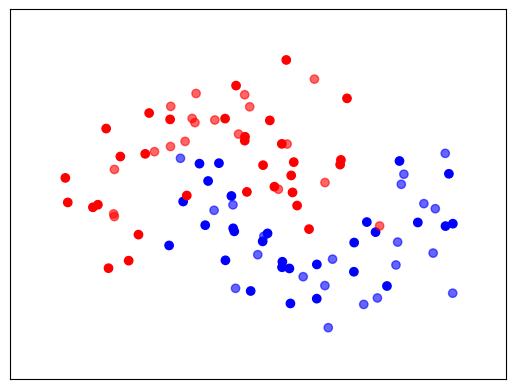

In [5]:
# Plot
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Grid
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

ax = plt.subplot()
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

### Classifier

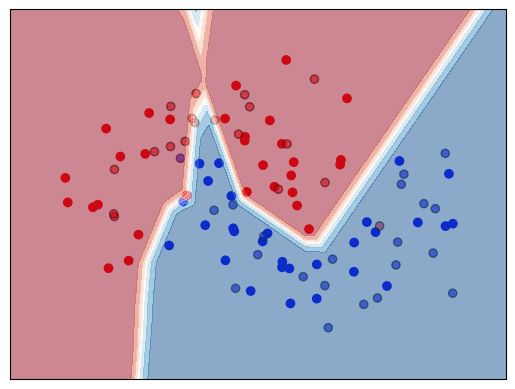

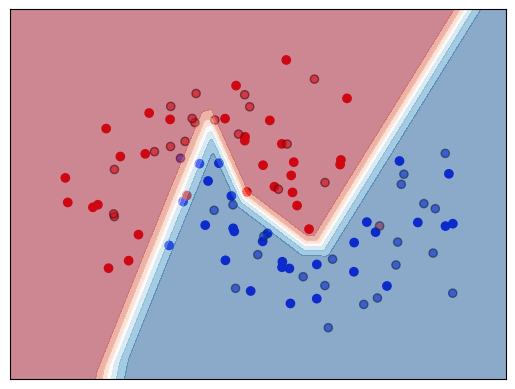

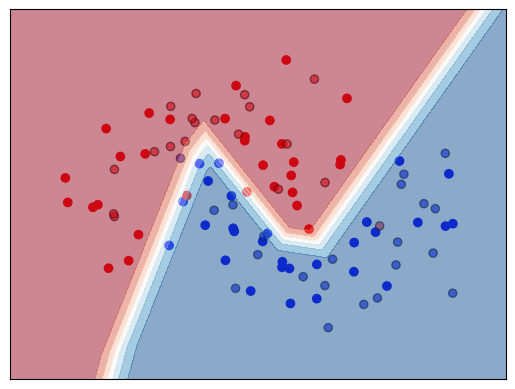

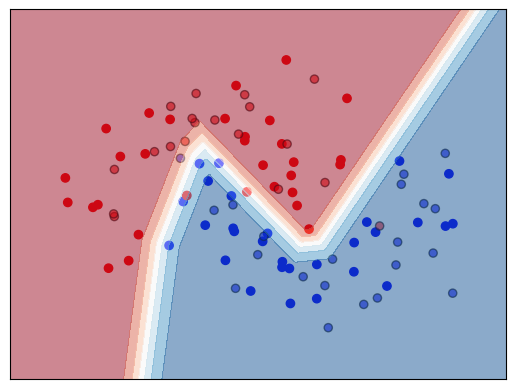

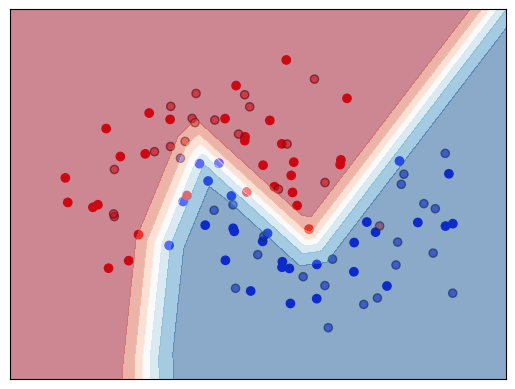

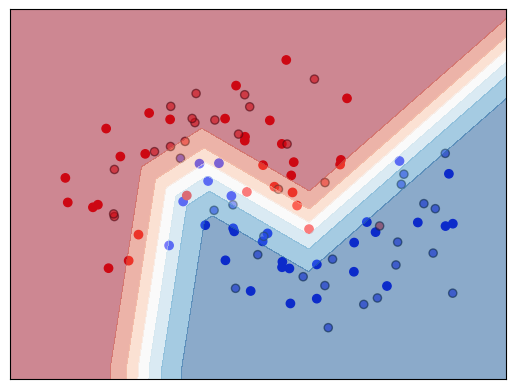

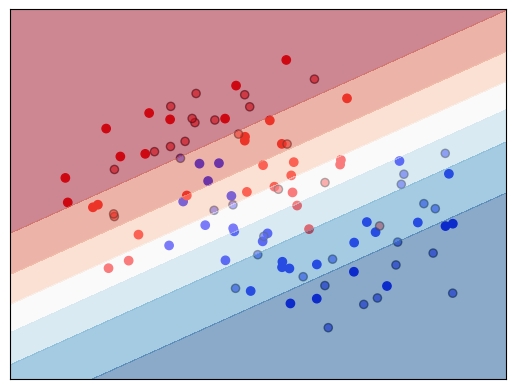

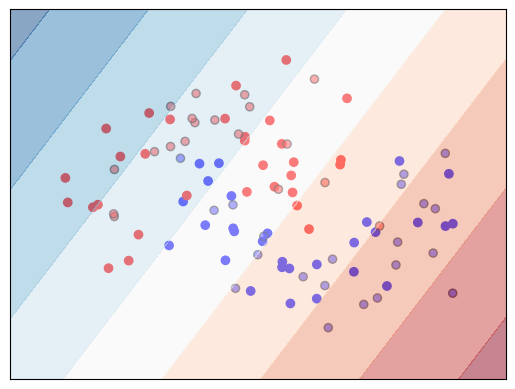

In [ ]:
# Change alpha in range of values [0.1, 0.3, 1.0, 3.0, 10.0] 
val_list = [0.05, 0.1, 0.2, 0.3, 0.5,  1.0, 3.0, 10.0]
dict_alpha = {}
for alpha in val_list:
    plt.figure()  # Initialize a new figure for each alpha value
    clf = MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            )
    clf.fit(X_train, y_train)
    # compare testing and training score
    score_test = clf.score(X_test, y_test)
    score_train = clf.score(X_train, y_train)
    # Plot 
    ax = plt.subplot()
    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="black",s=35)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    # Plot the decision boundary. 
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
    else:
        Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
    dict_alpha[alpha] = [score_train, score_test]


In [13]:
dict_alpha

{0.05: [1.0, 0.925],
 0.1: [0.9833333333333333, 0.95],
 0.2: [0.9666666666666667, 0.95],
 0.3: [0.9666666666666667, 0.95],
 0.5: [0.9666666666666667, 0.95],
 1.0: [0.9166666666666666, 0.95],
 3.0: [0.8333333333333334, 0.875],
 10.0: [0.5166666666666667, 0.475]}

Text(0.5, 0, 'alpha')

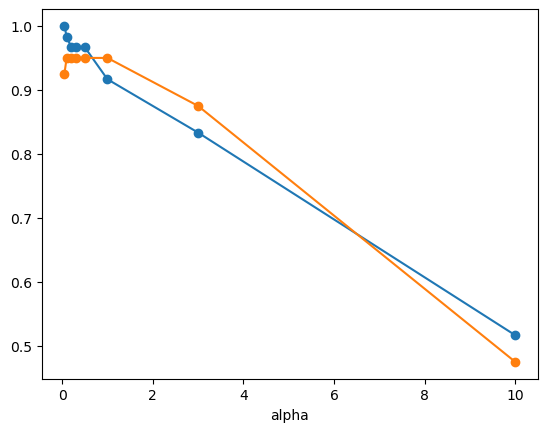

In [14]:
# Plot relation of alpha and score
plt.figure()
plt.plot(*zip(*dict_alpha.items()), marker="o")
plt.xlabel("alpha")


### Plot the decition boundary, report on training and testing accuracy

In [ ]:
# Task 1:
# Change alpha in range of values [0.1, 0.3, 1.0, 3.0, 10.0] and plot the effect 
pass 

In [ ]:
# Compare training and testing accuracy
pass 

In [ ]:
# Task 2: 
# Change the datasets and alpha 
X, y = datasets[0]
pass 

In [ ]:
# Compare training and testing accuracy
pass 

In [ ]:
# Plot the results 